(irt-notebook)=
# Modelli di risposta all'item 

In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(ltm)
    library(mirt)
    library(grid)
    library(TAM)
    # devtools::install_github("masurp/ggmirt")
    library(ggmirt)
    })

La Teoria della Risposta all'Item (IRT) è una metodologia fondamentale nell'analisi psicometrica, sviluppata per gestire e concettualizzare gli errori di misurazione inevitabili nelle risposte umane. Questi errori sono particolarmente rilevanti in contesti come i test di intelligenza, dove le risposte riflettono un'interazione tra l'intelligenza dell'individuo e le caratteristiche degli item del test. Ciò che rende l'IRT distintiva è la sua capacità di gestire risposte categoriali, dove le persone rispondono a item selezionando opzioni tra diverse categorie. L'IRT è utile per esaminare la qualità degli item, costruire punteggi basati su più item, sviluppare strumenti psicometrici e altro ancora. 

## La scala di Guttman

Prima di esplorare l'IRT, è importante comprendere lo scaling di Guttman, che stabilisce una relazione tra il livello di abilità di un rispondente e le sue risposte agli item. La Scala di Guttman, proposta da Louis Guttman, collega le abilità delle persone alla difficoltà degli item di un test. Questa scala viene rappresentata graficamente, mostrando come la probabilità di rispondere correttamente a un item vari con il livello di abilità del rispondente. Le *curve caratteristiche degli item* (ICC) illustrano questa probabilità. 

Sull'asse verticale del grafico si posiziona la probabilità di rispondere correttamente a un elemento, che Guttman sostiene essere o zero o 1.0. L'asse orizzontale rappresenta le abilità delle persone che affrontano il test. Le cinque frecce indicano cinque persone con diversi livelli di abilità.

Le linee nel grafico, note come curve caratteristiche degli item, mostrano la probabilità che una persona con un determinato livello di abilità risponda correttamente a ciascun elemento.

Ad esempio, una persona con un livello di abilità molto basso (indicato dalla prima freccia a sinistra) avrebbe una probabilità zero di rispondere correttamente a qualsiasi elemento. Persone con abilità leggermente superiori (rappresentate dalle successive frecce) avrebbero probabilità diverse di rispondere correttamente agli item, a seconda della loro posizione rispetto alla difficoltà di ciascun item. La quinta persona (indicata dalla freccia più a destra) risponderebbe correttamente a tutti e tre gli elementi.

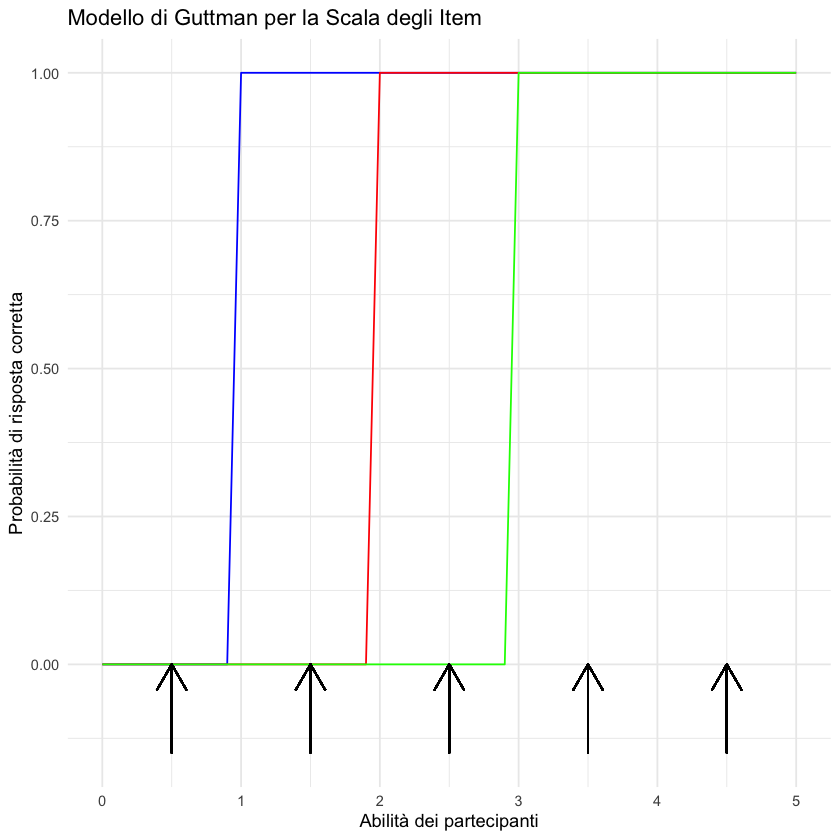

In [2]:
abilita <- seq(0, 5, by = 0.1)
difficolta_item_1 <- 1
difficolta_item_2 <- 2
difficolta_item_3 <- 3
probabilita_item_1 <- as.numeric(abilita >= difficolta_item_1)
probabilita_item_2 <- as.numeric(abilita >= difficolta_item_2)
probabilita_item_3 <- as.numeric(abilita >= difficolta_item_3)
data <- data.frame(abilita, probabilita_item_1, probabilita_item_2, probabilita_item_3)

p <- ggplot(data, aes(x = abilita)) +
    geom_line(aes(y = probabilita_item_1), color = "blue") +
    geom_line(aes(y = probabilita_item_2), color = "red") +
    geom_line(aes(y = probabilita_item_3), color = "green") +
    labs(
        x = "Abilità dei partecipanti", y = "Probabilità di risposta corretta",
        title = "Modello di Guttman per la Scala degli Item"
    ) +
    theme_minimal()

y_posizione_frecce <- -0.15 

p <- p + geom_segment(aes(x = 0.5, y = y_posizione_frecce, xend = 0.5, yend = 0), arrow = arrow(), color = "black") # Persona con bassa abilità
p <- p + geom_segment(aes(x = 1.5, y = y_posizione_frecce, xend = 1.5, yend = 0), arrow = arrow(), color = "black") # Seconda persona
p <- p + geom_segment(aes(x = 2.5, y = y_posizione_frecce, xend = 2.5, yend = 0), arrow = arrow(), color = "black") # Terza persona
p <- p + geom_segment(aes(x = 3.5, y = y_posizione_frecce, xend = 3.5, yend = 0), arrow = arrow(), color = "black") # Quarta persona
p <- p + geom_segment(aes(x = 4.5, y = y_posizione_frecce, xend = 4.5, yend = 0), arrow = arrow(), color = "black") # Quinta persona

print(p)


Il modello di Guttman, nel contesto della testistica psicologica, si basa su un'ipotesi fondamentale nella somma dei punteggi ottenuti dai partecipanti in un test. Secondo questa ipotesi, se un individuo risponde correttamente a un item di difficile risoluzione, si presume che abbia anche risposto correttamente a tutti gli item precedenti, di difficoltà inferiore. Questo principio implica che la capacità di rispondere a domande più difficili include implicitamente l'abilità di rispondere a quelle più semplici. Pertanto, il punteggio totale ottenuto in un test viene considerato un indicatore affidabile dell'abilità complessiva della persona.

Tuttavia, il modello di Guttman presenta alcune limitazioni. Una delle critiche principali è che raramente gli item di abilità formano scale di Guttman pure. In altre parole, non è sempre vero che i test seguano un andamento così rigido e prevedibile come quello proposto da Guttman. Infatti, nella realtà, la probabilità di rispondere correttamente a un item non sempre aumenta bruscamente da 0 a 1 al raggiungimento di una certa soglia di abilità, ma può variare più gradualmente nei termini di una funzione sigmoidale. Inoltre, è anche possibile ipotizzare che la ripidità delle ICC si differenzi per i diversi item di un test.

## Curva caratteristica dell'item

La curva caratteristica dell'item descrive come varia la probabilità di una risposta corretta ad un item in funzione dell'abilità latente del rispondente. A differenza dello scaling di Guttman, la IRT fornisce un modello statistico per descrivere la ICC. Tra i vari modelli IRT che descrivono la relazione tra probabilità di risposta corretta e abilità latente, il modello di Rasch è il più semplice in quanto ipotizza che tutte le ICC siano parallele tra loro e abbiano la stessa pendenza. 

Una rappresentazione grafica delle ICC di cinque item nel caso del modello di Rash è fornita nella figura successiva. L'asse orizzontale (asse x) rappresenta l'abilità latente $\theta$ dei rispondenti, mentre l'asse verticale (asse y) indica la probabilità di una risposta corretta. Le curve sigmoidali, ciascuna in un colore diverso, rappresentano i diversi item. Si noti che le curve sono parallele. Queste curve mostrano come la probabilità di rispondere correttamente a ogni item varia in funzione dell'abilità del rispondente.

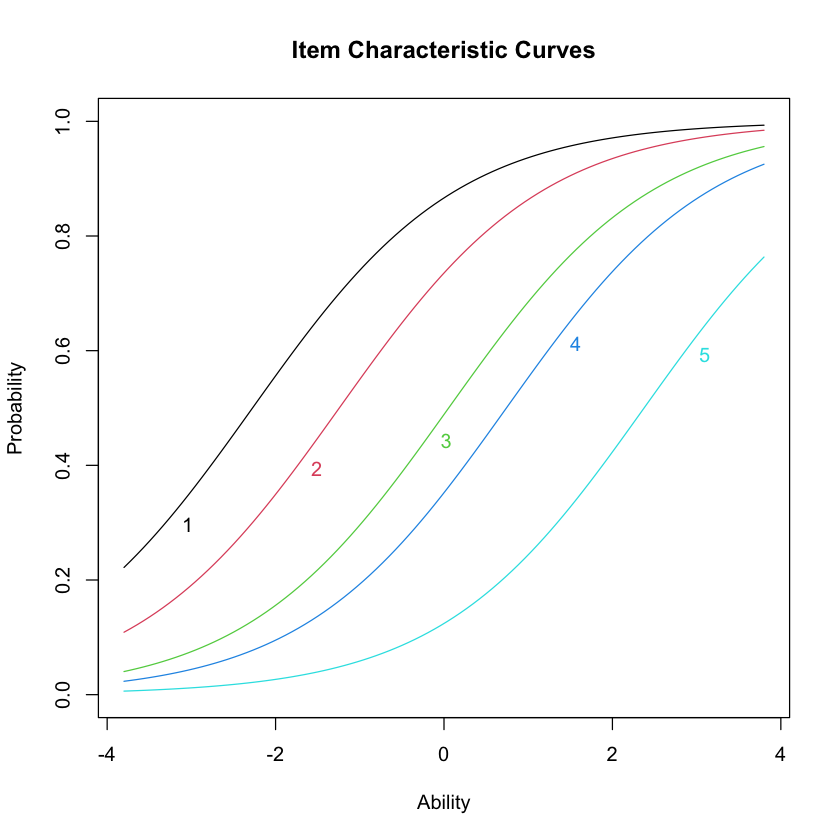

In [3]:
# Definisci le difficoltà degli item
difficulties <- c(-2, -1, 0, 1, 2)

# Genera dati simulati che riflettano queste difficoltà
# Assumendo che l'abilità sia distribuita normalmente
set.seed(123)
num_subjects <- 100
abilities <- rnorm(num_subjects)
data <- matrix(ncol = 5, nrow = num_subjects)

for (i in 1:5) {
    prob_success <- 1 / (1 + exp(-(abilities - difficulties[i])))
    data[, i] <- rbinom(num_subjects, 1, prob_success)
}

# Adatta il modello di Rasch
rasch_model <- rasch(data)

# Crea le curve caratteristiche degli item
plot(rasch_model, type = "ICC")

La formulazione del modello di Rasch si differenzia dalla teoria classica dei test (CTT) in diversi modi cruciali. 

1. **Espressione a Livello di Item e Strumento**:
   - Nel modello di Rasch, l'analisi è condotta sia a livello di singolo item sia a livello dello strumento di misurazione nel suo complesso. Questo è in contrasto con la teoria classica dei test, dove l'analisi si concentra principalmente a livello dello strumento di misurazione nel suo complesso.
   - Nella teoria classica dei test, il punteggio totale su uno strumento ($X$), come espresso nell'equazione $X = T + E$, è definito in termini di $T$ (abilità vera) ed $E$ (errore). Invece, nel modello di Rasch, ciò che viene modellato è la risposta all'item specifico, seguendo così la tradizione focalizzata sull'item di Guttman.

2. **Parametri di Persona e Item**:
   - Il modello di Rasch include sia un parametro della persona (a livello dello strumento) sia parametri dell'item (a livello dell'item). 
   - Questo approccio rende il modello di Rasch un modello multi-livello, dove vengono considerati sia i fattori relativi all'individuo che quelli specifici di ciascun item.

3. **Modellazione della Probabilità delle Risposte Osservate**:
   - Il modello di Rasch si concentra sulla modellazione della probabilità delle risposte osservate, piuttosto che sulla somma delle risposte, come avviene nella teoria classica dei test.
   - Questo approccio rappresenta una significativa deviazione dalla CTT. Mentre la CTT si concentra sui punteggi totali e la loro distribuzione, il modello di Rasch si focalizza sulle probabilità delle risposte individuali, offrendo una comprensione più dettagliata delle prestazioni dei rispondenti e delle caratteristiche degli item.

In sintesi, il modello di Rasch fornisce un'analisi più focalizzata sia sugli item specifici sia sull'intero strumento di misurazione, tenendo conto sia delle caratteristiche dei rispondenti sia delle proprietà degli item, e concentrandosi sulla probabilità di ogni singola risposta piuttosto che sulla somma totale delle risposte. Altri modelli IRT assumono invece che le ICC abbiano pendenze diverse.

## Il Modello di Rasch per Risposte Binarie

Esaminiamo in maggiore dettaglio il Modello di Rasch. La relazione tra l'abilità latente e le risposte osservate, ovvero la *funzione caratteristica dell'item*, deve essere monotona. In altre parole, al crescere dell'abilità latente $\theta$, deve corrispondere un aumento della probabilità di fornire una risposta corretta. Questa relazione è modellata utilizzando la funzione logit, una trasformazione usata nella regressione logistica:

$$ 
P(\theta) = \frac{e^{f(\theta)}}{1 + e^{f(\theta)}},
$$

dove $P(\theta)$ è la probabilità che la variabile osservata assuma il valore 1 data la variabile latente $\theta$, e $f(\theta)$ mappa $\theta$ in un intervallo da $-\infty$ a $+\infty$.

Applicando questa logica al contesto del Modello di Rasch, la probabilità condizionata $\pi_i(\theta)$ di una risposta corretta, data la variabile latente $\theta$, è espressa come:

$$ 
\ln \left( \frac{\pi_i(\theta)}{1 - \pi_i(\theta)} \right) = \mu_i + \lambda_i \theta,
$$

dove $\mu_i$ rappresenta l'intercetta per l'item i-esimo e $\lambda_i$ è il coefficiente di regressione relativo a $\theta$ per l'item i-esimo. La probabilità $\pi_i(\theta)$ indica la probabilità di una risposta corretta per l'item i, e viene trasformata per esprimere $\pi_i(\theta)$ come:

$$ 
\pi_i(\theta) = \frac{e^{\mu_i + \lambda_i \theta}}{1 + e^{\mu_i + \lambda_i \theta}}.
$$ (eq-mod-LTA-prob1)

Il Modello di Rasch presume che tutte le curve caratteristiche degli item siano identiche. Questo principio è paragonabile all'idea degli item paralleli nei modelli per variabili continue usati nell'analisi fattoriale. Il modello presuppone l'esistenza di un singolo tratto latente che influenzi le risposte a tutti gli item. Di conseguenza, il modello di Rasch non solo incorpora un tratto latente comune a tutti gli item ma stabilisce anche una relazione uniforme tra questo tratto e le risposte fornite, semplificando così la struttura del modello.

La formula per il modello di Rasch è:

$$ 
P(Y_{vi} = 1 \mid \theta_v, \beta_i) = \frac{\exp(\theta_v - \beta_i)}{1 + \exp(\theta_v - \beta_i)} = \frac{1}{1 + \exp(-(\theta_v - \beta_i))}. 
$$ (eq-rasch-model)

Qui, $P(Y_{vi} = 1 \mid \theta_v, \beta_i)$ rappresenta la probabilità che un individuo, identificato con $\nu$ e caratterizzato da un livello di abilità $\theta_{\nu}$, risponda correttamente all'item $i$. Il termine a destra dell'equazione descrive come questa probabilità sia determinata dalla differenza tra l'abilità $\theta_{\nu}$ del rispondente e la difficoltà $\beta_i$ dell'item.

## Il Modello di Rasch e la Scala dei Logit

Il modello di Rasch utilizza la scala dei logit per descrivere la probabilità di fornire una risposta corretta a un item. Ricordiamo che il logit è definito come il logaritmo naturale dell'Odds di successo: $\ln \left[\frac{P(X=1)}{P(X=0)}\right]$. Utilizzando l'equazione {eq}`eq-rasch-model`, possiamo esprimere la probabilità dell'evento $ Y=1 $ nel seguente modo:

$$
\begin{align}
\ln \left[\frac{P(Y_{\nu i} = 1 \mid  \theta_v, \beta_i)}{1 - P(Y_{vi} = 1 \mid \theta_v, \beta_i)} \right] &= \ln \left( \frac{ \frac{e^{\theta_v-\beta_i}}{1 + e^{\theta_v-\beta_i}} }{ 1 - \frac{e^{\theta_v-\beta_i}}{1 + e^{\theta_v-\beta_i}}} \right) \notag\\ 
&= \ln \left( \frac{ \frac{e^{\theta_v-\beta_i}}{1 + e^{\theta_v-\beta_i}} }{ \frac{1 + e^{\theta_v-\beta_i} - e^{\theta_v-\beta_i}}{1 + e^{\theta_v-\beta_i}} } \right) \notag\\
&= \theta_v - \beta_i.
\end{align}
$$ (eq-rasch-logit)

Questa equazione mostra che, sulla scala dei logit, la probabilità di una risposta corretta all'item i-esimo è determinata dalla differenza tra il livello di abilità $\theta_v$ del rispondente $v$-esimo e la difficoltà dell'item $\beta_i$. Maggiore è la differenza $\theta_v - \beta_i$, maggiore sarà la probabilità di fornire una risposta corretta $P(X_{vi} = 1)$ rispetto alla probabilità di fornire una risposta errata $1 - P(X_{vi} = 1)$. Di conseguenza, valori più alti sulla scala dei logit indicano una maggiore discrepanza tra l'abilità del rispondente e la difficoltà dell'item, e quindi una maggiore probabilità di risposta corretta.

## Il Modello di Rasch e l'Analisi Fattoriale

Per una migliore comprensione del Modello di Rasch, è utile confrontarlo con l'Analisi Fattoriale. Nonostante le loro differenze come metodologie statistiche, entrambi cercano un obiettivo comune: comprendere le dimensioni latenti sottostanti alle risposte osservate nei dati. Questo parallelo aiuta a mettere in luce le somiglianze e le differenze tra i due approcci.

Nell'Analisi Fattoriale, il modello tipico è espresso come $Y_i = \lambda_i \xi + \delta_i$, dove $Y_i$ è il punteggio osservato per l'item i-esimo, $\lambda_i$ rappresenta la saturazione fattoriale che indica quanto l'item è influenzato dal fattore latente $\xi$, e $\delta_i$ è il termine di errore specifico per quell'item. L'idea centrale è che, controllando per $\xi$, le correlazioni tra gli item $Y_i$ diventano nulle, poiché qualsiasi associazione comune è spiegata dal fattore latente.

D'altra parte, il Modello di Rasch adotta un approccio leggermente diverso, ma con lo stesso obiettivo fondamentale: identificare e gestire l'influenza di una dimensione latente (spesso chiamata abilità) sulle risposte agli item. In questo contesto, si considerano risposte dicotomiche (0 o 1), e si presume che la probabilità di una risposta corretta a un item sia una funzione logistica dell'abilità del rispondente $\theta$ e della difficoltà dell'item $\beta_i$.

La principale differenza tra il Modello di Rasch e l'Analisi Fattoriale risiede nella formulazione dei parametri. Mentre l'Analisi Fattoriale stima le saturazioni fattoriali per ciascun item, il Modello di Rasch assume che tutti gli item abbiano lo stesso potere discriminante, cioè sono ugualmente efficaci nel distinguere tra rispondenti con diversi livelli di abilità. Invece di concentrarsi sulle saturazioni fattoriali, il Modello di Rasch si concentra sulla stima dell'abilità dei rispondenti $\theta$ e sulla difficoltà degli item $\beta_i$, presupponendo che gli item siano equivalenti in termini di discriminazione.

In conclusione, sia il Modello di Rasch che l'Analisi Fattoriale mirano a isolare e controllare l'effetto di una dimensione latente sull'associazione tra gli item, cercando di spiegare le risposte osservate attraverso questa dimensione. Mentre l'Analisi Fattoriale si concentra sulla stima delle saturazioni fattoriali e sull'identificazione di fattori latenti comuni tra gli item, il Modello di Rasch si focalizza sulla stima dell'abilità dei rispondenti e sulla difficoltà degli item, fornendo un quadro più specifico e dettagliato delle dinamiche che influenzano le risposte agli item.

## Assunzioni Fondamentali del Modello di Rasch

Il modello di Rasch si fonda su tre assunzioni essenziali che sono cruciali per la sua validità e applicabilità: unidimensionalità, monotonicità e indipendenza locale. 

1. **Unidimensionalità**: Questa assunzione stabilisce che un singolo tratto latente, o dimensione di attributo di una persona, predomina nell'influenzare la probabilità di risposta agli item. In pratica, ciò significa che le risposte agli item di un test sono determinate principalmente da una sola caratteristica o abilità latente. Se fossero presenti più dimensioni, il modello non sarebbe più unidimensionale e la rappresentazione grafica necessiterebbe di una struttura tridimensionale.

2. **Monotonicità**: Secondo questa assunzione, all'aumentare del valore dell'attributo latente (indicato con $ \theta $), aumenta anche la probabilità di una risposta corretta. Questo principio è intuitivo in ambito di misurazione: ci si aspetta che rispondenti con un livello più elevato dell'attributo latente tendano a ottenere punteggi più alti nel test.

3. **Indipendenza Locale**: Dopo aver controllato per il tratto latente, qualsiasi correlazione tra le risposte a due item differenti dovrebbe annullarsi. Ciò implica che eventuali associazioni osservate tra le risposte a diversi item sono attribuibili esclusivamente al tratto latente misurato. In altre parole, una volta controllato per il tratto latente, la risposta a un item non dovrebbe essere influenzata né influenzare la risposta a un altro item.

La violazione di una qualsiasi di queste assunzioni suggerisce che potrebbe essere necessario adottare metodologie più complesse o approcci alternativi per analizzare i dati. In tali casi, potrebbe essere richiesto un esame più approfondito dei dati o l'impiego di modelli più avanzati che possano gestire meglio la complessità dei dati osservati.

## Oggettività Specifica 

Un'importante caratteristica del modello di Rasch è la sua capacità di stimare oggettivamente la difficoltà degli item, indipendentemente dalle abilità dei partecipanti. Questo concetto è noto come "oggettività specifica".

Nel modello di Rasch, la difficoltà di ciascun item viene determinata attraverso un metodo chiamato "stima di massima verosimiglianza condizionale". Questo metodo consente di valutare la difficoltà degli item senza che questa stima sia influenzata dalle capacità specifiche dei rispondenti. In altre parole, la difficoltà di ogni item viene calcolata in modo indipendente, basandosi esclusivamente sulle risposte a quel particolare item, senza essere alterata dal livello generale di abilità dei partecipanti al test.

Questa proprietà del modello di Rasch è simile a ciò che avviene in una analisi di regressione, dove la pendenza e l'intercetta di una linea di regressione non cambiano a seconda del campione analizzato. Analogamente, nel modello di Rasch, i parametri di difficoltà degli item rimangono costanti e non vengono influenzati dalle competenze generali dei rispondenti. Questo significa che le valutazioni della difficoltà degli item sono stabili e affidabili, indipendentemente dalla varietà o dal livello generale di abilità del campione di rispondenti.

L'oggettività specifica è particolarmente importante perché elimina la necessità di avere campioni di rispondenti normati o rappresentativi della popolazione generale. In pratica, quasi qualsiasi gruppo di persone può essere utilizzato per stabilire la difficoltà degli item, a condizione che ci sia una varietà sufficiente nelle loro risposte (alcuni che riescono e altri che non riescono negli stessi item). Questo contrasta con l'approccio dei test convenzionali, dove è spesso necessario selezionare un campione rappresentativo e utilizzare le risposte per creare tabelle normative basate sulle percentuali di risposte corrette. 

## Un'Applicazione Concreta

Esaminiamo ora un'applicazione concreta del modello di Rasch.

Anche se in questo tutorial ci concentreremo sul pacchetto mirt, esistono diversi pacchetti utilizzabili per stimare i modelli IRT. Tra i più comuni vi sono `ltm`, `eRm` e `TAM`. Per questo tutorial, per le principali analisi IRT useremo il pacchetto `mirt`. Caricheremo inoltre il pacchetto `ggmirt`, che rappresenta un'estensione di `mirt` e, tra le varie funzioni per creare grafici e per facilitare la valutazione dell'adattamento del modello, include una funzione per simulare dati per le analisi IRT. Creiamo dunque un set di dati con 500 osservazioni e 10 item.

In [4]:
set.seed(42)
d <- sim_irt(500, 10, discrimination = .25, seed = 42)
head(d)

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.
ℹ The deprecated feature was likely used in the ggmirt package.
  Please report the issue to the authors.”


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,1,0,1,1,1,0,1
0,1,1,0,0,0,0,0,0,1
0,1,0,1,0,1,0,1,0,0
0,0,1,0,0,1,0,0,0,1
0,1,1,1,0,0,1,1,1,0
0,0,1,0,0,0,0,1,0,1


Immaginiamo di aver somministrato un test (ad esempio, un test di conoscenza, un esame, ecc.) a 500 persone. Ogni "partecipante" ha risposto a 10 item binari.  Un punteggio di 1 significa che la persona ha risposto correttamente a una determinata domanda/item. Un punteggio di 0 indica invece che la persona ha risposto erroneamente a quell'item.

Per adattiamo il modello di Rash ai dati usiamo la funzione `mirt()`.

In [5]:
fit1PL <- mirt(d, 1, itemtype = "Rasch", verbose = FALSE)
fit1PL


Call:
mirt(data = d, model = 1, itemtype = "Rasch", verbose = FALSE)

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 20 EM iterations.
mirt version: 1.41 
M-step optimizer: nlminb 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Log-likelihood = -2746.893
Estimated parameters: 11 
AIC = 5515.786
BIC = 5562.147; SABIC = 5527.232
G2 (1012) = 514.28, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

L'oggetto creato è di classe "SingleGroupClass" e contiene tutte le informazioni e i dati necessari per valutare il modello. Eseguendo l'oggetto, otteniamo informazioni sul tipo di stima e alcuni indici di adattamento del modello (inclusi AIC e BIC), utili per confrontare diversi modelli tra loro.

## Comprendere i Parametri

Abbiamo visto come un'analisi IRT può essere paragonata a un'analisi fattoriale. Utilizzando la funzione `summary()`, otteniamo quella che viene definita soluzione fattoriale, che include i carichi fattoriali (F1) e le comunalità (h2). Le comunalità, essendo carichi fattoriali al quadrato, sono interpretate come la varianza spiegata in un item dal tratto latente. Nel caso presente, tutti gli item hanno una relazione sostanziale (saturazioni > .50) con il tratto latente, indicando che il tratto latente è un buon indicatore della varianza osservata in quegli item. Questo suggerisce che il tratto latente è in grado di spiegare una porzione significativa della varianza nei punteggi degli item.

In [6]:
summary(fit1PL)

       F1   h2
V1  0.557 0.31
V2  0.557 0.31
V3  0.557 0.31
V4  0.557 0.31
V5  0.557 0.31
V6  0.557 0.31
V7  0.557 0.31
V8  0.557 0.31
V9  0.557 0.31
V10 0.557 0.31

SS loadings:  3.102 
Proportion Var:  0.31 

Factor correlations: 

   F1
F1  1


Nell'IRT, tuttavia, siamo generalmente più interessati ai parametri specifici IRT (discriminazione e difficoltà). Questi parametri possono essere estratti dall'oggetto creato da `mirt()` nel seguente modo:

In [7]:
params1PL <- coef(fit1PL, IRTpars = TRUE, simplify = TRUE)
round(params1PL$items, 2) # g = c = guessing parameter

,a,b,g,u
V1,1,1.67,0,1
V2,1,-0.62,0,1
V3,1,0.37,0,1
V4,1,0.80,0,1
V5,1,0.59,0,1
V6,1,-0.17,0,1
V7,1,2.30,0,1
V8,1,0.02,0,1
V9,1,3.14,0,1
V10,1,-0.07,0,1


1. **a (Discriminazione)**: Il parametro $a$ (discriminazione) rappresenta la pendenza delle curve caratteristiche degli item (ICC - Item Characteristic Curves). In termini più specifici:
   - Una **pendenza elevata** (valore alto di $a$) indica che l'item è molto efficace nel distinguere tra individui con livelli diversi del tratto latente (ad esempio, abilità). Questo significa che piccole variazioni nel tratto latente portano a grandi cambiamenti nella probabilità di rispondere correttamente all'item.
   - Una **pendenza bassa** (valore basso di $a$) suggerisce che l'item non è altrettanto efficace nel discriminare tra livelli diversi del tratto latente. In questo caso, anche ampie variazioni nel tratto latente comportano solo piccoli cambiamenti nella probabilità di risposta corretta.
   - Nel modello IRT a un parametro (1PL), come il modello di Rasch, si assume che tutti gli item abbiano la stessa pendenza (o potere discriminante), e quindi tutti i valori di $a$ sono fissati allo stesso valore (di solito 1). 

2. **b (Difficoltà)**: Rappresenta il livello di abilità a cui un rispondente ha il 50% di probabilità di rispondere correttamente all'item. Un valore positivo indica un item più difficile (richiede un livello di abilità superiore per rispondere correttamente), mentre un valore negativo indica un item più facile. Ad esempio, V7 ha un valore di difficoltà di 2.30, il che significa che è relativamente difficile, mentre V2, con un valore di -0.62, è relativamente facile.

3. **g (Probabilità di Indovinare)**: In questo modello, la probabilità di indovinare è impostata a zero per tutti gli item, il che è coerente con il modello di Rasch, dove non si considera la possibilità di indovinare correttamente un item per caso.

## Bontà di Adattamento

Similmente agli approcci di analisi fattoriale, possiamo valutare quanto bene il modello si adatti ai dati. Invece di utilizzare una statistica $\chi^2$, usiamo un indice specifico, M2, che è progettato appositamente per valutare l'adattamento dei modelli di risposta all'item.

In [8]:
M2(fit1PL)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,51.47802,44,0.2043459,0.01845511,0,0.03664579,0.04903324,0.9891628,0.9894036


La statistica M2 è relativamente bassa e non significativa, indicando che non ci sono differenze preoccupanti tra il modello e i dati. Questo è ulteriormente supportato da un RMSEA molto basso e da un CFA e TLI prossimi a 1.

Tuttavia, nell'IRT, ci interessiamo maggiormente agli indici di adattamento degli item e delle persone. L'IRT ci consente di valutare quanto bene ogni item si adatti al modello e se i pattern di risposta individuali sono allineati con il modello.

Partiamo dall'adattamento degli item. Sono stati proposti diversi indici per valutare l'adattamento degli item e possiamo utilizzare la funzione `itemfit()` per ottenere una varietà di questi indici. Di default, riceviamo l'S_X2 di Orlando e Thissen (2000) con i corrispondenti gradi di libertà (dfs), RMSEA e valori p. Questo test dovrebbe risultare non significativo per indicare un buon adattamento dell'item. Come vediamo qui sotto, solo l'item V9 mostra un adattamento inferiore. 

In [9]:
itemfit(fit1PL)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
V1,9.963607,7,0.02912803,0.1906452
V2,1.665085,5,0.00000000,0.8932688
V3,7.426816,6,0.02183022,0.2831710
V4,4.040845,6,0.00000000,0.6711489
V5,3.237000,6,0.00000000,0.7785667
V6,3.202982,6,0.00000000,0.7829732
V7,10.638021,6,0.03935867,0.1002291
V8,7.999053,6,0.02583963,0.2381727
V9,12.900604,6,0.04800845,0.0446418


Nel contesto del modello di Rasch, si pone particolare attenzione all'analisi delle statistiche di infit e outfit, che sono indici critici per valutare l'adattamento dei dati al modello.

La statistica di outfit, uno di questi indici, è calcolata come la media dei quadrati dei residui standardizzati. Un residuo è la differenza tra la risposta osservata e quella attesa da un rispondente per un dato item. La risposta attesa è basata sulla probabilità calcolata dal modello di Rasch che il rispondente dia una risposta corretta a quell'item. Per esempio, se il modello prevede una probabilità del 40% che un rispondente risponda correttamente a un item, e il rispondente fornisce effettivamente una risposta corretta, il residuo sarà $1 - 0.40 = 0.60$.

Il residuo standardizzato, $ Z_{si} $, è poi calcolato tramite la formula:

$$
Z_{si} = \frac{X_{si} - E(X_{si})}{\sqrt{Var(X_{si})}},
$$

dove:
- $ Z_{si} $ è lo z-score del residuo per il rispondente $ s $ all'item $ i $.
- $ X_{si} $ rappresenta la risposta osservata del rispondente $ s $ all'item $ i $.
- $ E(X_{si}) $ è la risposta attesa, ovvero la probabilità stimata di una risposta corretta, per il rispondente $ s $ all'item $ i $, come prevista dal modello di Rasch.
- $ Var(X_{si}) $ è la varianza della risposta attesa per il rispondente $ s $ all'item $ i $.

Lo z-score standardizzato aiuta a identificare i casi in cui le risposte dei rispondenti deviano significativamente dalle aspettative del modello. Residui con z-score significativamente alti o bassi possono segnalare problemi di adattamento del modello a quei dati specifici.

L'indice di infit è un altro indice critico nel modello di Rasch. A differenza dell'outfit, che è più influenzato da risposte casuali o outlier, l'infit è più sensibile alle risposte che sono incoerenti con il pattern generale del modello. L'infit è calcolato come una media ponderata dei residui standardizzati, dove i pesi sono inversamente proporzionali alla varianza degli item. Questo rende l'infit particolarmente utile per identificare problemi di adattamento del modello legati alla consistenza interna delle risposte.

Per ottenere le statistiche di infit e outfit, è possibile utilizzare l'argomento `fit_stats = "infit"` nella funzione `itemfit()`. Questo permette di ottenere sia le versioni quadratiche medie sia quelle standardizzate di queste misure. Linacre fornisce linee guida per la loro interpretazione, disponibili all'indirizzo [https://www.rasch.org/rmt/rmt162f.htm](https://www.rasch.org/rmt/rmt162f.htm). Generalmente, i valori non standardizzati dovrebbero situarsi tra 0.5 e 1.5 per essere considerati accettabili.

In [10]:
itemfit(fit1PL, fit_stats = "infit") 

item,outfit,z.outfit,infit,z.infit
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
V1,0.6965602,-3.015776,0.8568138,-2.15528515
V2,0.8290059,-3.074598,0.8671678,-3.56784061
V3,0.8210230,-3.803499,0.8714244,-3.59185038
V4,0.8091443,-3.198260,0.8684851,-3.12504644
V5,0.8005462,-3.813964,0.8609898,-3.61722974
V6,0.8138464,-4.178570,0.8503497,-4.48141825
V7,0.7281043,-1.808226,0.9681214,-0.29523779
V8,0.8753291,-2.808556,0.9126985,-2.55609950
V9,0.6140973,-1.683441,1.0070507,0.09709703


Nel pacchetto ggmirt, possiamo anche utilizzare la funzione `itemfitPlot()` per ispezionare visivamente questo aspetto.

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


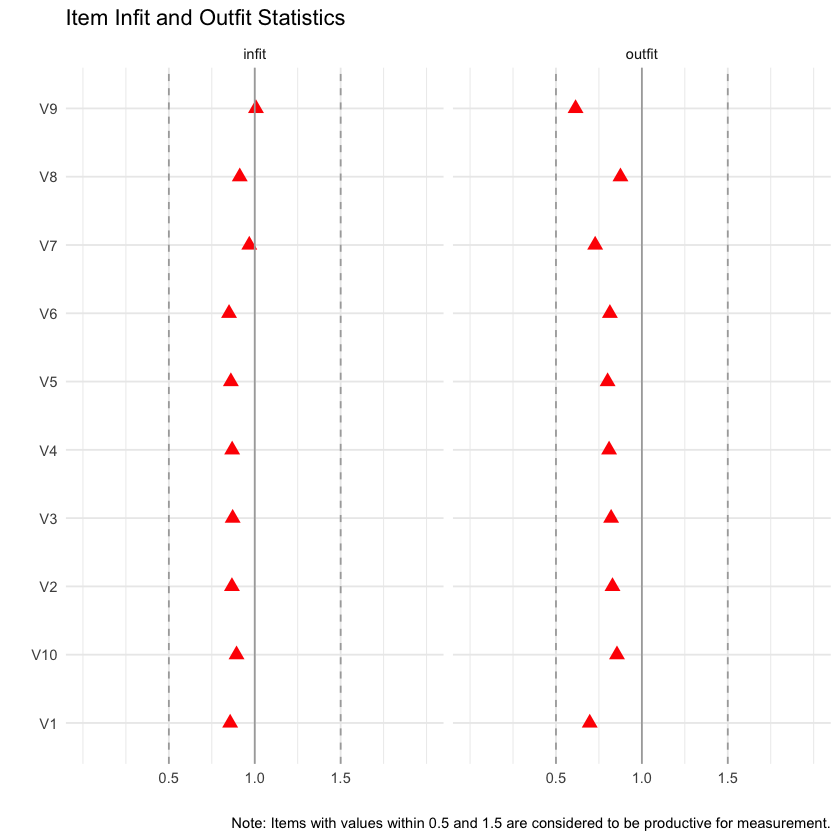

In [11]:
itemfitPlot(fit1PL)


Osserviamo nuovamente che l'item V9 presenta un adattamento inferiore (valore di outfit vicino a 0.5), ma secondo le linee guida di Linacre, ciò non dovrebbe essere motivo di preoccupazione.


## Valutare l'Adattamento delle Persone

Possiamo tecnicamente generare le stesse misure per ogni persona per valutare quanto bene i pattern di risposta di ciascuno si allineano con il modello. Possiamo pensare a in questo modo: se una persona con un alto valore di theta (cioè alta abilità latente) non risponde correttamente a un item facile, questa persona non si adatta bene al modello. Al contrario, se una persona con bassa abilità risponde correttamente a una domanda molto difficile, anche questo non è conforme al modello. Nella pratica, è probabile che ci saranno alcune persone che non si adattano bene al modello. Tuttavia, finché il numero di rispondenti non conformi è basso, la situazione è accettabile. Di solito, ci concentriamo nuovamente sulle statistiche di infit e outfit. Se meno del 5% dei rispondenti presenta valori di infit e outfit superiori o inferiori a 1.96 e -1.96, possiamo considerare il modello adeguato.

In [12]:
head(personfit(fit1PL))

,outfit,z.outfit,infit,z.infit,Zh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9940921,0.1217803,1.0168433,0.15671292,-0.04009289
2,0.6479582,-0.3695500,0.8143843,-0.63139813,0.66343106
3,0.7056442,-0.4305414,0.8356943,-0.62336826,0.65240983
4,0.7385001,-0.1989923,0.9348439,-0.15118513,0.32452771
5,2.2938763,2.4761297,1.7896444,2.20208688,-2.78187891
6,0.7775077,-0.1298064,0.9870054,0.04396602,0.17801766


In [13]:
personfit(fit1PL) %>%
    summarize(
        infit.outside = prop.table(table(z.infit > 1.96 | z.infit < -1.96)),
        outfit.outside = prop.table(table(z.outfit > 1.96 | z.outfit < -1.96))
    ) # lower row = non-fitting people

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame
  and adjust accordingly.”


infit.outside,outfit.outside
<table[1d]>,<table[1d]>
0.966,0.98
0.034,0.02


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


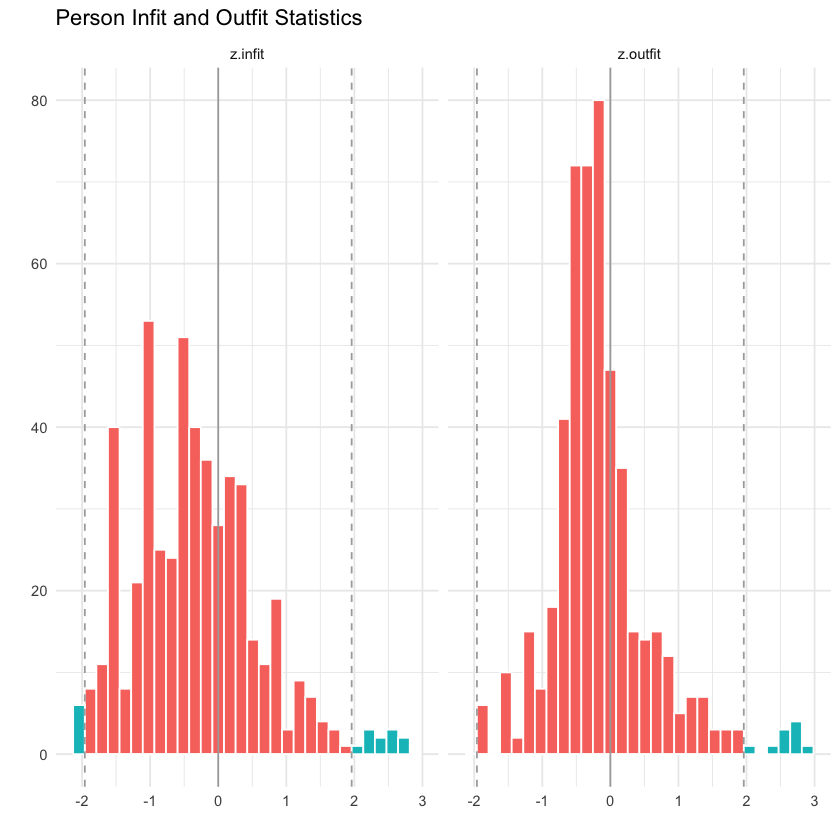

In [14]:
personfitPlot(fit1PL)

## Grafici Specifici IRT

Oltre alla valutazione complessiva dell'adattamento del modello, dell'adattamento degli item e delle persone, possiamo esaminare molti altri aspetti. Alcune domande tipiche includono:

- Quanto bene gli item coprono l'intervallo dell'abilità latente?
- C'è ridondanza tra gli item?
- A quali livelli di theta la scala funziona meglio?

A molte di queste domande si può rispondere visualizzando diversi aspetti dei modelli IRT.

**Mappa Item-Persona (Wright Map)**
La prima domanda può essere valutata utilizzando una cosiddetta "Mappa Item-Persona" (noto anche come Wright Map). Questa visualizzazione inizia tracciando la distribuzione dell'abilità latente nel campione studiato. Successivamente, tracciamo anche la difficoltà di ciascun item sulla stessa scala di theta. Allineando entrambi i grafici, possiamo vedere quanto bene gli item coprono l'abilità latente.

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


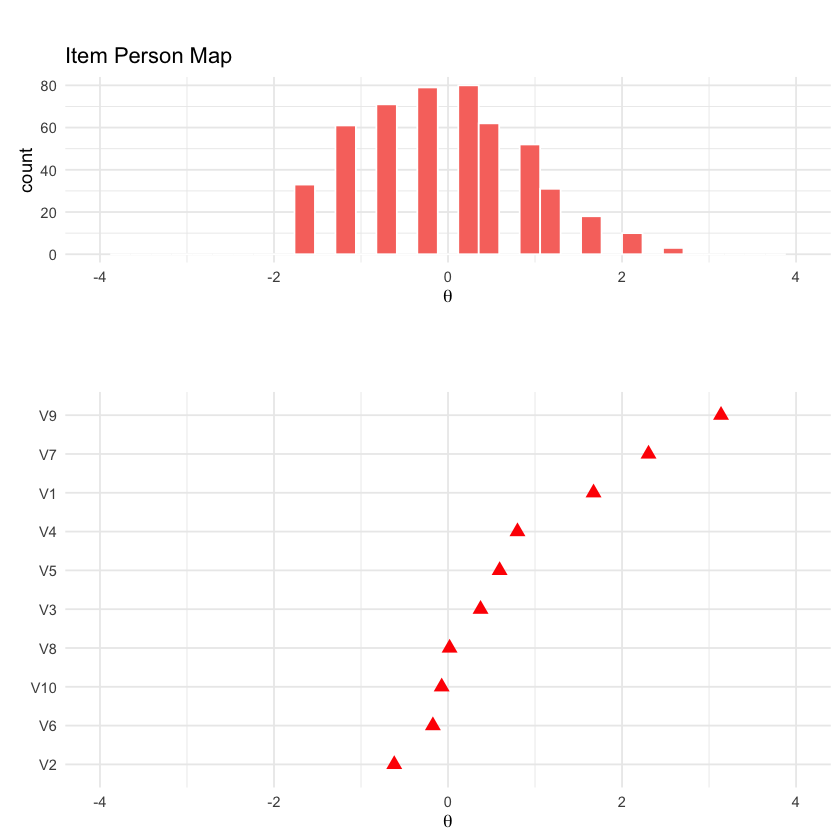

In [15]:
itempersonMap(fit1PL)

**Curve Caratteristiche degli Item**

Le curve caratteristiche degli item offrono un quadro dettagliato e visuale di come ciascun item del test si comporta attraverso diversi livelli dell'abilità latente. Per esempio:

1. **Visualizzazione della Difficoltà e della Discriminazione:**
   - Supponiamo di avere un item che mostra una curva con una ripida salita in un punto specifico della scala di abilità. Questo indica che l'item ha una difficoltà concentrata attorno a quel punto e che discrimina efficacemente tra rispondenti con abilità appena al di sotto e al di sopra di quel livello. 
   - Al contrario, una curva più graduale suggerisce che l'item è meno discriminante, con una variazione più ampia nella probabilità di risposta corretta a seconda del livello di abilità.

2. **Identificazione di Lacune nella Valutazione:**
   - Visualizzando le curve di più item, possiamo identificare se ci sono lacune nella copertura dell'abilità latente. Ad esempio, se tutti gli item hanno curve che si concentrano su livelli di abilità bassi, potrebbe esserci una mancanza di item difficili per misurare l'abilità ad alti livelli.
   - Inoltre, se le curve degli item si sovrappongono eccessivamente, potrebbe indicare ridondanza tra gli item, suggerendo che alcuni di essi non aggiungono informazioni uniche alla valutazione.

3. **Confronto tra Diversi Tipi di Item:**
   - Per esempio, gli item progettati per misurare concetti di base potrebbero avere curve che mostrano alta probabilità di risposta corretta anche a livelli di abilità bassi.
   - Al contrario, item progettati per essere più impegnativi potrebbero mostrare probabilità elevate di risposta corretta solo a livelli di abilità più alti.

Nel caso presente, vediamo che l'item 9 mostra una buona capacità discriminante solo a livelli alti di abilità.

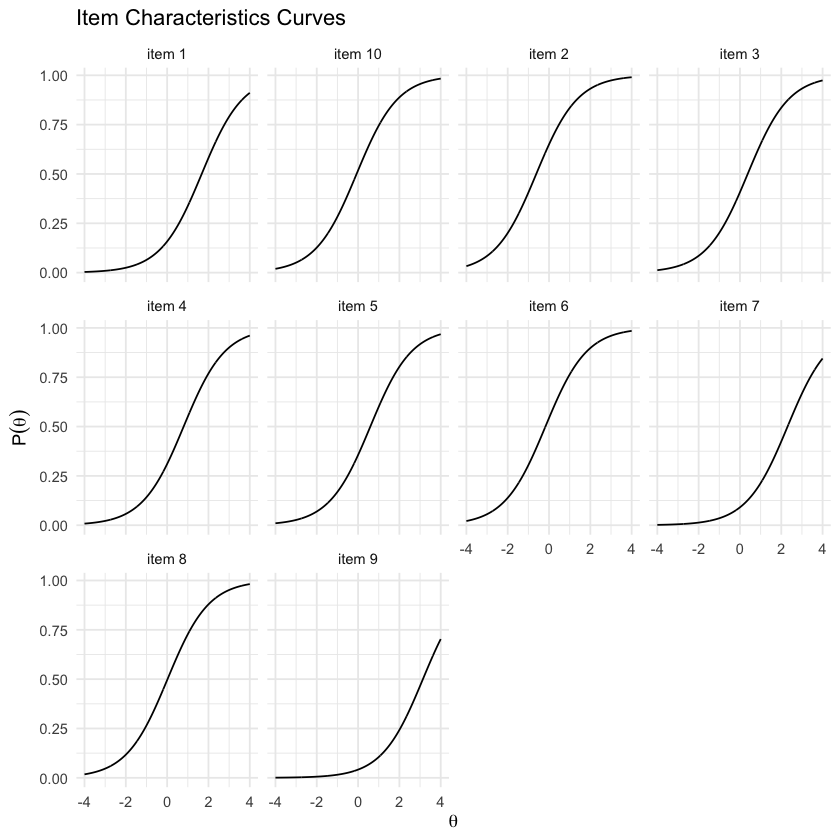

In [16]:
tracePlot(fit1PL)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


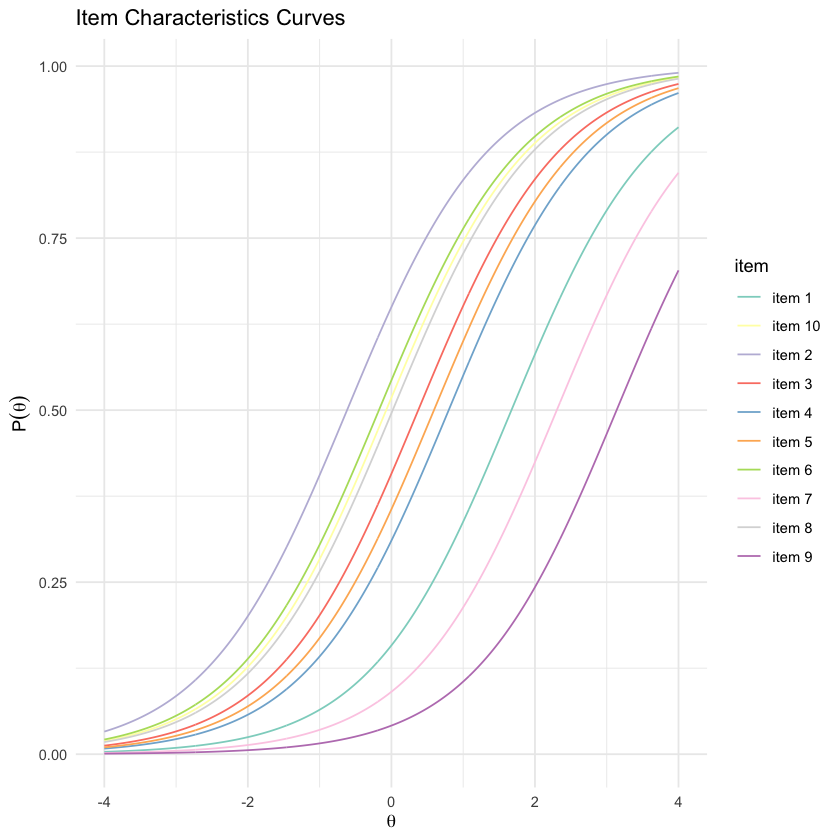

In [17]:
tracePlot(fit1PL, facet = F, legend = T) + scale_color_brewer(palette = "Set3")


**Curve di Informazione degli Item**

Un altro modo per valutare la qualità di ciascun item è tramite la creazione delle cosiddette curve di informazione degli item. L'informazione è un concetto statistico che si riferisce alla capacità di un item di stimare con precisione i punteggi su theta. L'informazione a livello di item chiarisce quanto bene ogni item contribuisca alla precisione nella stima dei punteggi, con livelli più elevati di informazione che portano a stime dei punteggi più accurate.

Per esempio:
- Un item con un'elevata informazione sarà molto utile per discriminare tra rispondenti con diversi livelli di abilità latente attorno a un certo punto della scala di theta. Questo significa che l'item fornisce dati affidabili e significativi sulla capacità o conoscenza che si sta misurando.
- Al contrario, un item con bassa informazione non aggiunge molto alla precisione della stima del punteggio. Questo potrebbe accadere se l'item è troppo facile o troppo difficile per la maggior parte dei rispondenti, o se non è strettamente correlato al tratto latente che si sta cercando di misurare.

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the ggmirt package.
  Please report the issue to the authors.”


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


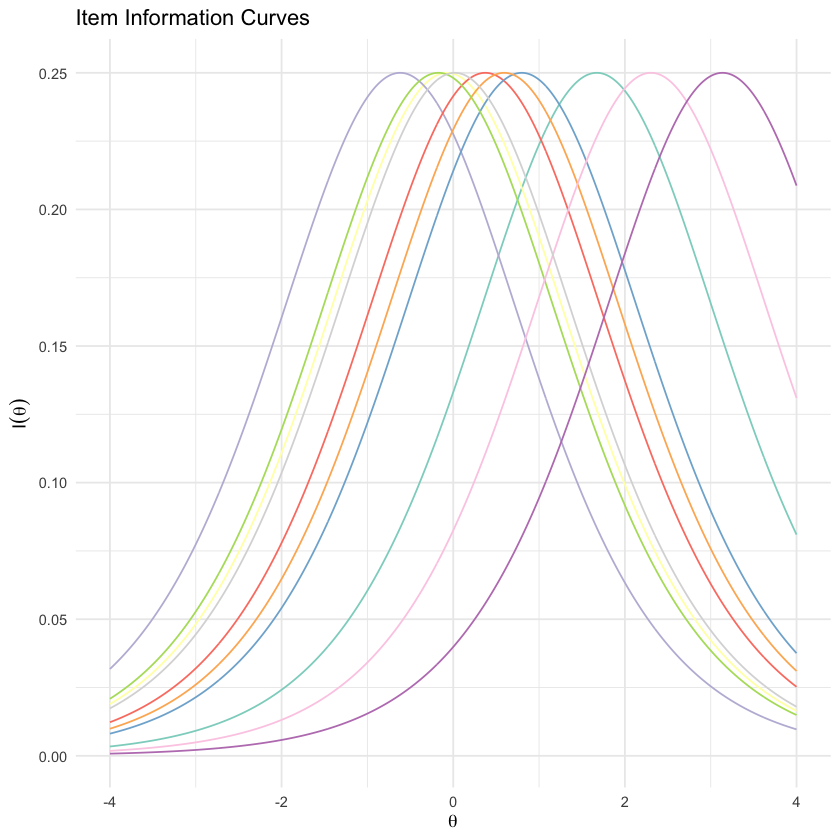

In [18]:
itemInfoPlot(fit1PL) + scale_color_brewer(palette = "Set3")


Qui vediamo chiaramente che alcuni item forniscono maggiori informazioni sui livelli più alti di theta, mentre altri coprono l'intera gamma di theta.

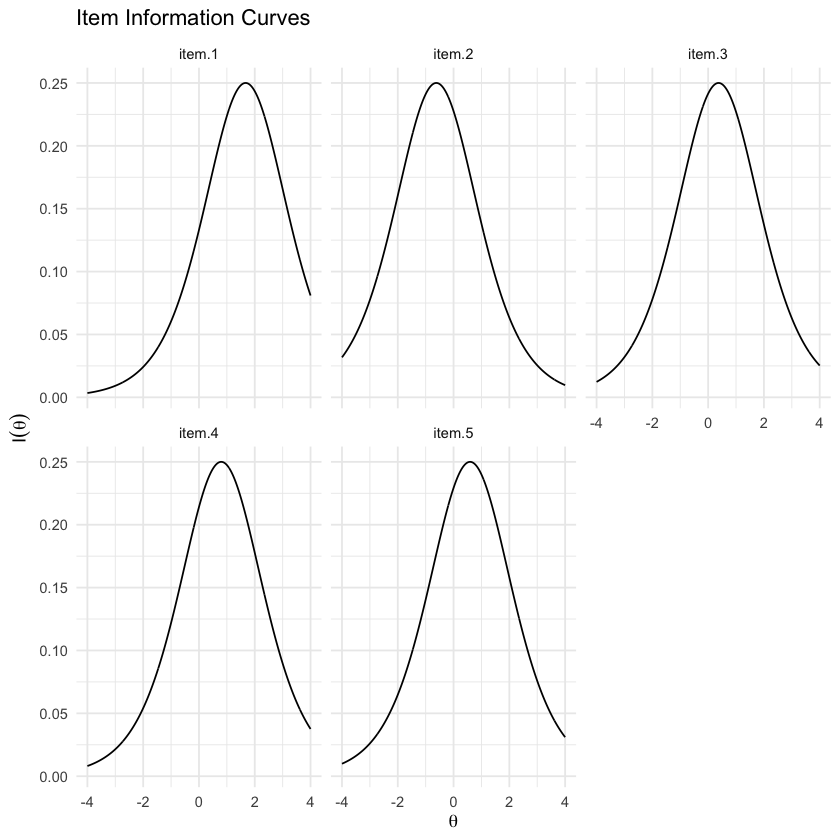

In [19]:
itemInfoPlot(fit1PL, items = c(1:5), facet = TRUE) 


**Curve di Informazione del Test**

Il concetto di "informazione" può essere applicato anche all'intera scala del test. In questo caso, osserviamo che la scala è molto efficace nel stimare i punteggi di theta tra -2 e 3, ma presenta una minore precisione nella stima dei punteggi di theta agli estremi. In altre parole, il test fornisce stime accurate per una vasta gamma di abilità medie e leggermente superiori alla media, ma diventa meno affidabile per valutare abilità molto basse o molto elevate.

Questa osservazione ha importanti implicazioni pratiche:
- **Valutazione Ottimale per la Maggior Parte dei Rispondenti**: La scala è particolarmente adatta per valutare rispondenti il cui livello di abilità si trova all'interno dell'intervallo in cui il test è più informativo (-2 a 4).
- **Limiti nella Valutazione degli Estremi**: Per rispondenti con abilità molto al di sotto di -2 o molto al di sopra di 4, il test potrebbe non fornire stime di abilità così precise. Questo significa che per questi individui, il test potrebbe non essere in grado di discriminare efficacemente tra diversi livelli di abilità.
  
Le curve di informazione del test aiutano a identificare dove il test è più efficace e dove potrebbe aver bisogno di miglioramenti o aggiustamenti, come l'aggiunta di item più difficili o più facili per estendere la sua precisione ai livelli estremi di abilità. Questa analisi consente di ottimizzare il test per una valutazione più accurata su tutta la gamma di abilità latente che si intende misurare.

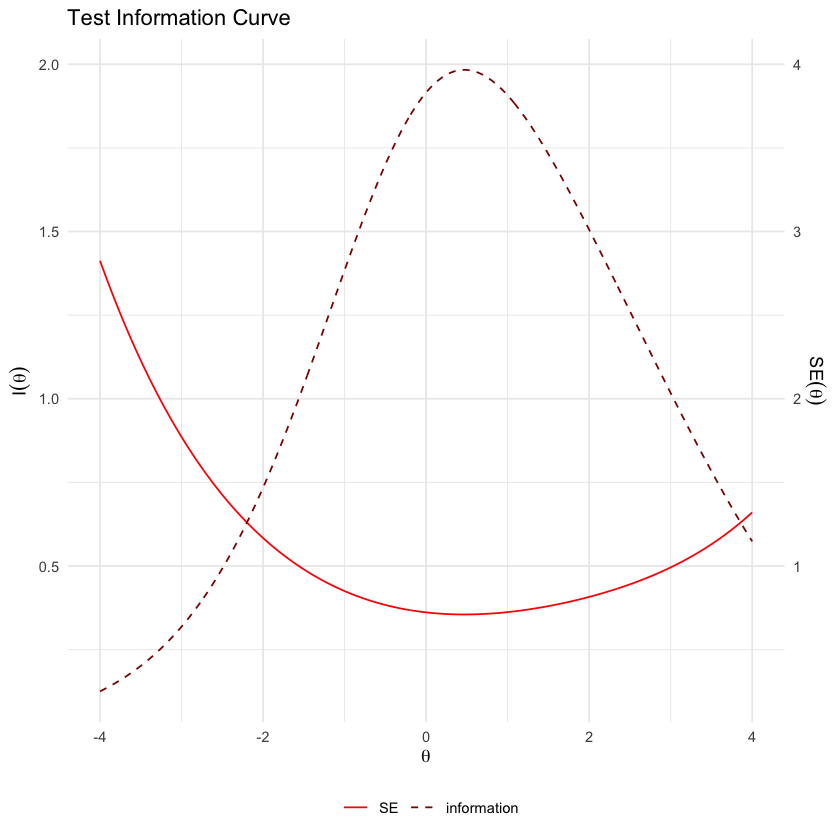

In [20]:
testInfoPlot(fit1PL, adj_factor = 2)

**Affidabilità Condizionale**

Il concetto di affidabilità varia tra la Teoria Classica dei Test (CTT) e la Teoria della Risposta all'Item (IRT). Nell'IRT, possiamo calcolare l'affidabilità condizionale, ossia l'affidabilità della scala a diversi livelli di theta. 

- Nella **CTT**, l'affidabilità è solitamente considerata come una proprietà fissa del test, indipendentemente dal livello di abilità dei rispondenti. Si misura spesso attraverso il coefficiente alfa di Cronbach o metodi simili.
- Nell'**IRT**, invece, l'affidabilità è vista come una proprietà variabile che dipende dal livello di theta del rispondente. A diversi livelli di theta, la precisione con cui il test misura l'abilità può variare significativamente.
  
L'affidabilità condizionale fornisce una misura più specifica e dettagliata di quanto affidabilmente un test misura l'abilità a diversi livelli di theta. Nel caso presente, 
- **A Livelli Medi di Theta**: Il test mostra una buona affidabilità, indicando che è in grado di distinguere con precisione tra rispondenti con abilità medie.
- **Agli Estremi di Theta**: Il test mostra un'affidabilità più bassa, suggerendo che non è altrettanto efficace nel distinguere tra livelli di abilità molto alti o molto bassi.

In sostanza, l'affidabilità condizionale nell'IRT ci fornisce una comprensione più dettagliata di dove il test funziona bene e dove potrebbe richiedere miglioramenti per valutare con precisione l'abilità su tutta la gamma di theta.

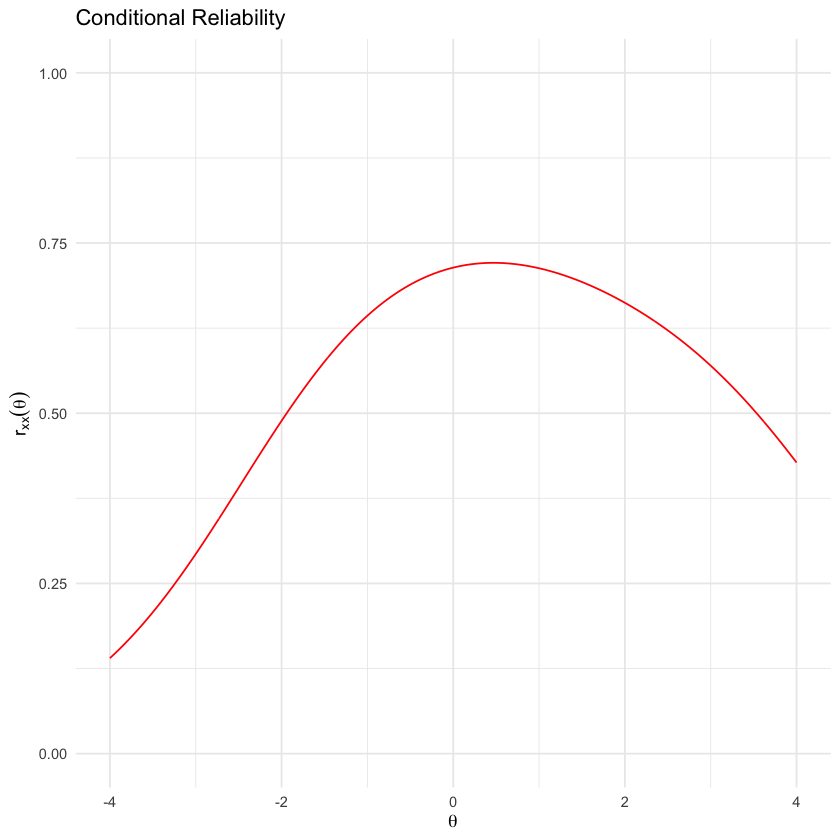

In [21]:
conRelPlot(fit1PL)


È comunque possibile calcolare un singolo valore di attendibilità:

In [22]:
marginal_rxx(fit1PL)


[1] 0.6200104

**Curve Caratteristiche della Scala**

Una proprietà aggiuntiva di un modello IRT è che il punteggio complessivo delle risposte corrette (la somma dei punteggi per le risposte corrette) risulta essere una stima efficace del tratto latente sottostante. Un grafico delle cosiddette curve caratteristiche della scala permette di valutare visivamente questo aspetto tracciando la relazione tra theta e il punteggio di risposte corrette.

- Questo tipo di grafico mostra come il punteggio totale delle risposte corrette si correla con il livello di abilità latente (theta) stimato dal modello IRT.
- Ad esempio, se la curva mostra che punteggi più alti di risposte corrette corrispondono sistematicamente a livelli più alti di theta e viceversa, ciò indica che il punteggio totale è un buon indicatore del tratto latente.
- Al contrario, se la curva non mostra una relazione chiara o lineare tra punteggio totale e theta, ciò potrebbe suggerire che il punteggio totale non cattura completamente la complessità o le sfumature del tratto latente.

In sintesi, le curve caratteristiche della scala forniscono una rappresentazione visiva di come il punteggio totale di risposte corrette rifletta l'abilità latente misurata dal test, offrendo una visione utile per valutare l'efficacia del punteggio totale come indicatore del tratto latente in questione.

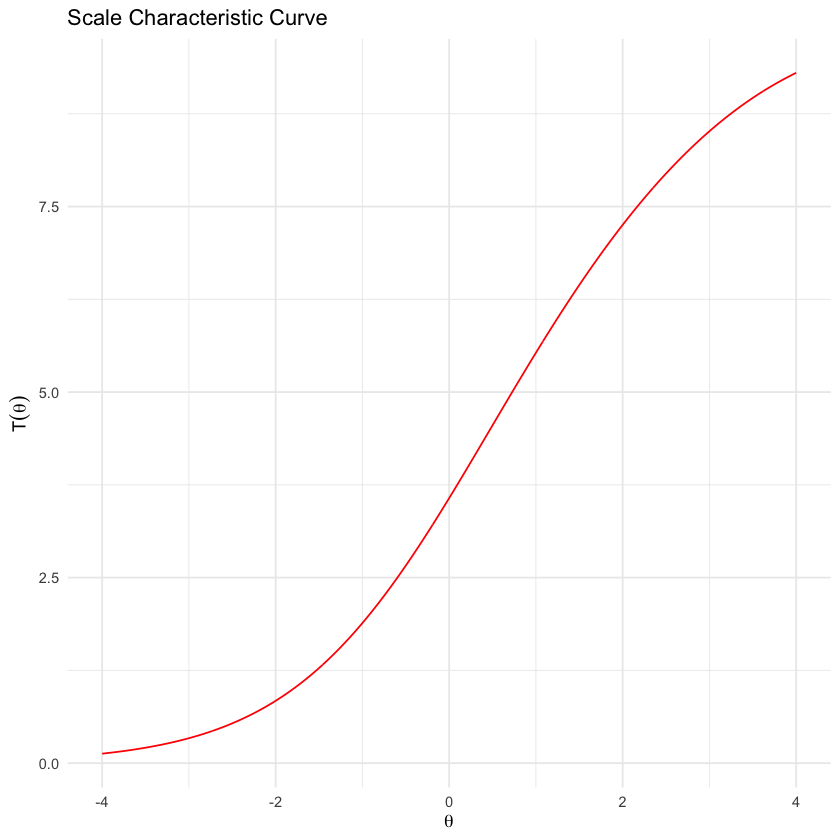

In [23]:
scaleCharPlot(fit1PL)


ChatGPT
Questa curva di solito assume la forma di una S, poiché la relazione è più forte nel range medio di theta e meno precisa agli estremi (come già visto nella curva di informazione del test). Possiamo ovviamente testare anche questo con una semplice correlazione. Per prima cosa, estraiamo il punteggio latente IRT utilizzando la funzione `fscores()`. Quindi lo correlazioniamo con il semplice punteggio di risposte corrette.

In [24]:
score <- fscores(fit1PL)
sumscore <- rowSums(d)
cor.test(score, sumscore)


	Pearson's product-moment correlation

data:  score and sumscore
t = 409.53, df = 498, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9982341 0.9987574
sample estimates:
      cor 
0.9985187 


Nel caso presente, la correlazione è quasi perfetta.

In conclusione, non ci sono evidenze di violazione delle assunzioni, per cui dobbiamo concludere che il modello di Rash è adeguato per i presenti dati.

## Modello IRT a due parametri

Il modello 2PL, noto come "Modello IRT a due parametri", prevede che le curve caratteristiche degli item non siano tra loro parallele. Questo modello utilizza due parametri per descrivere le curve caratteristiche di ciascun item: il parametro di difficoltà $\beta_i$ e il parametro di discriminazione $\alpha_i$. Il parametro $\alpha_i$ consente alle curve caratteristiche di avere pendenze diverse e riflette la capacità discriminante dell'item rispetto alla variabile latente. Le curve caratteristiche nel modello 2PL hanno la seguente forma:

$$
\begin{equation} 
  Pr(X_{vi} = 1 \mid \theta_v, \beta_i, \alpha_i) = \frac{\exp(\alpha_i(\theta_v-\beta_i))}{1+ \exp(\alpha_i(\theta_v-\beta_i))}.
\end{equation}
$$ (eq-2pl)

Adattiamo il modello 2PL ai dati.

In [25]:
fit2PL <- mirt(d, model = 1, itemtype = "2PL", verbose = FALSE)

Esaminiamo i coefficienti.

In [26]:
coef(fit2PL, IRTpars = TRUE)

,a,b,g,u
par,1.69869,1.168329,0,1
,a,b,g,u
par,1.018359,-0.5818296,0,1
,a,b,g,u
par,1.083872,0.3432059,0,1
,a,b,g,u
par,1.275067,0.6568518,0,1
,a,b,g,u
par,1.17717,0.5137876,0,1
,a,b,g,u


Esaminiamo le curve caratteristiche degli item.

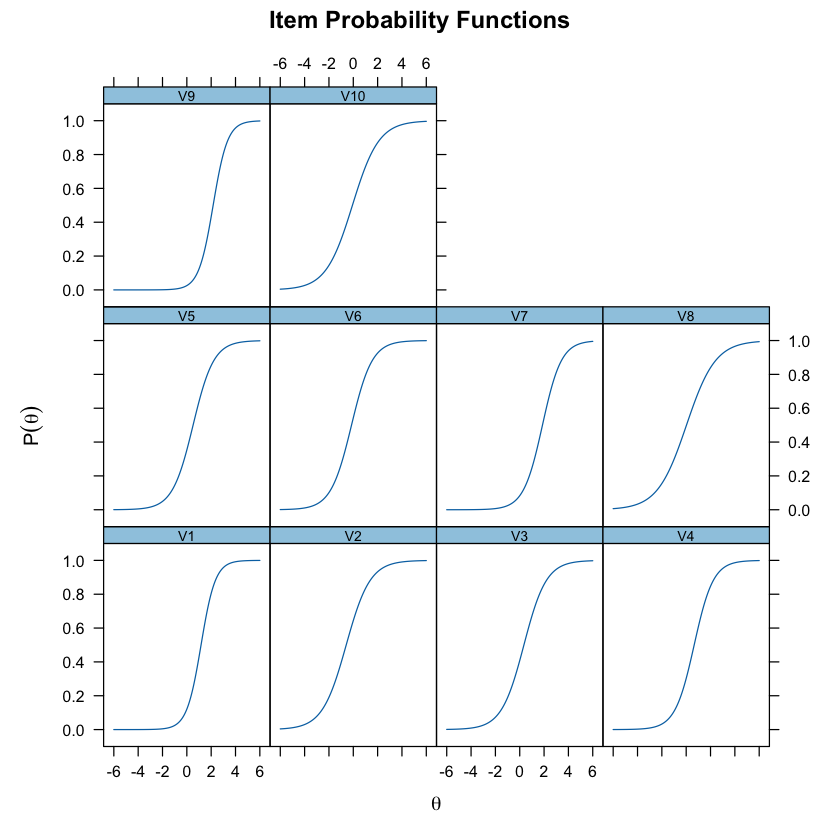

In [27]:
plot(fit2PL, type = "trace")

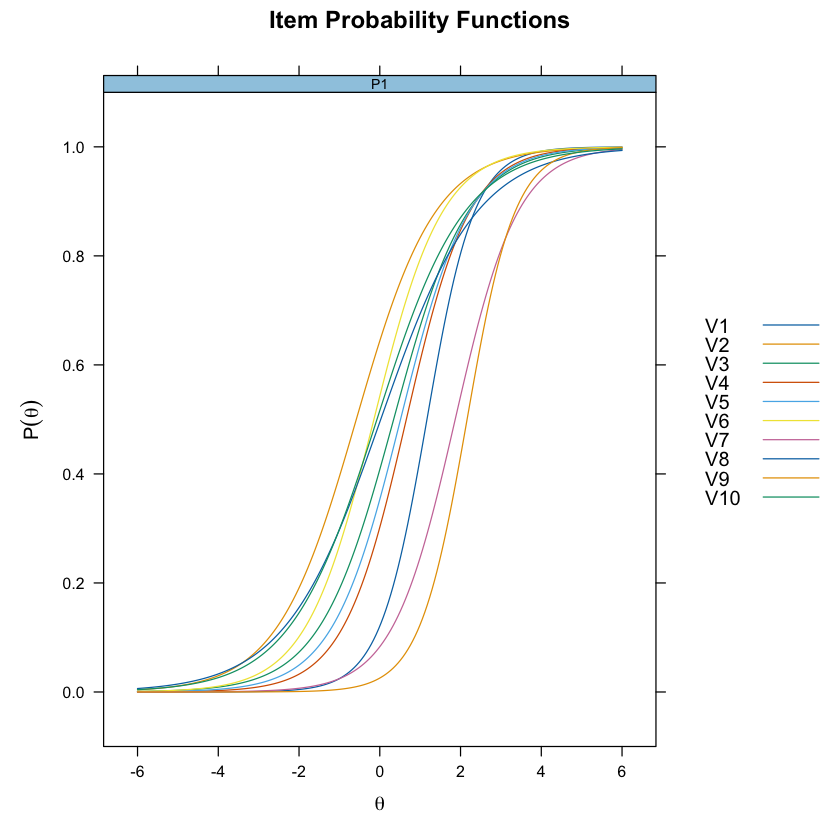

In [28]:
plot(fit2PL, type = "trace", facet_items = FALSE)

Effettuiamo un confronto tra il modello di Rash e il modello 2PL.

In [29]:
anova(fit1PL, fit2PL)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit1PL,5515.786,5527.232,5533.978,5562.147,-2746.893,NA,NA,NA
fit2PL,5518.465,5539.276,5551.541,5602.757,-2739.232,15.32166,9,0.08247097


Il test del rapporto di verosimiglianze indica che il modello 2PL non fornisce un adattamento migliore ai dati del modello di Rash.

## Modello IRT a tre parametri

Per considerare l'eventuale tendenza dei rispondenti a indovinare, i modelli IRT introducono un ulteriore parametro, denotato con $\gamma_i$. Il modello a tre parametri (3PL) assume la seguente forma:

$$
\begin{equation} 
Pr(X_{vi} = 1 \mid \theta_v, \beta_i, \alpha_i, \gamma_i) = \gamma_i + (1-\gamma_i) \frac{\exp(\alpha_i(\theta_v-\beta_i))}{1 + \exp(\alpha_i(\theta_v-\beta_i))}.
\end{equation}
$$ (eq-3pl)

Il parametro $\gamma_i$ ha l'effetto di introdurre un asintoto orizzontale maggiore di zero per valori di $\theta_v$ tendenti a $-\infty$. In altre parole, per item con $\gamma_i = 0.25$, la probabilità di risposta corretta dovuta al caso è almeno pari a 0.25, anche per i livelli di abilità latente più bassi.

In [30]:
fit3PL <- mirt(d, model = 1, itemtype = "3PL", verbose = FALSE)

Esaminiamo i parametri

In [31]:
coef(fit3PL, IRTpars = TRUE)

,a,b,g,u
par,1.702576,1.168331,0.0001847327,1
,a,b,g,u
par,1.018063,-0.5794042,0.00101664,1
,a,b,g,u
par,1.078414,0.3492798,0.001445519,1
,a,b,g,u
par,1.803036,0.8097484,0.09218104,1
,a,b,g,u
par,1.191779,0.5248071,0.004935434,1
,a,b,g,u


Esaminiamo le curve caratteristiche degli item.

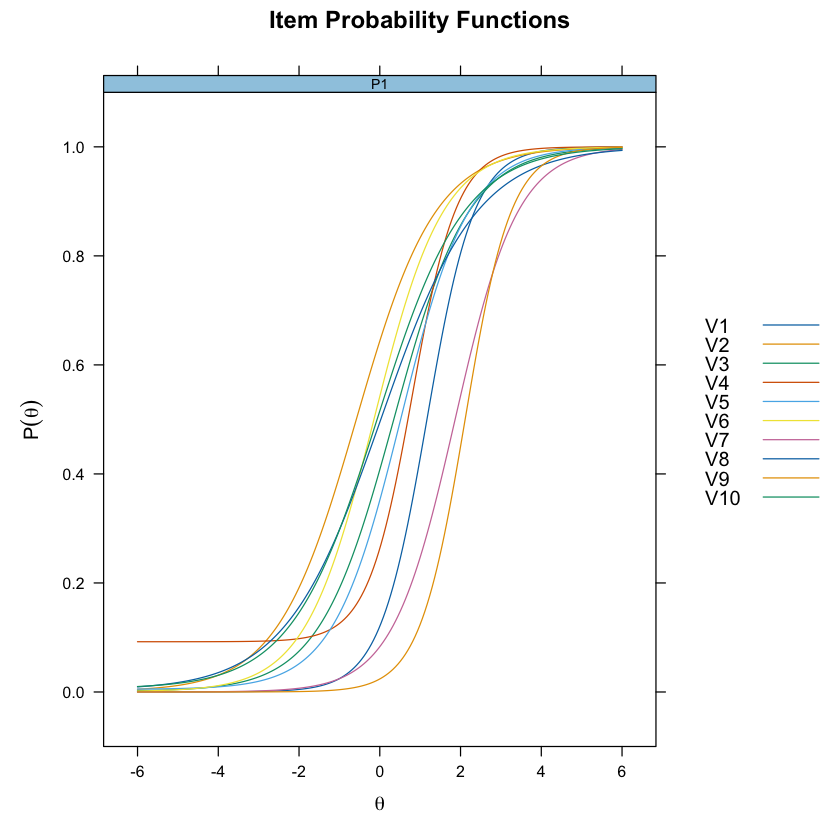

In [32]:
plot(fit3PL, type = "trace", facet_items = FALSE)

Un elemento chiave del modello 3PL è che l'asintoto inferiore, rappresentato dal parametro $\gamma_i$, assume un valore maggiore di zero. Questo implica che la probabilità di una risposta corretta, rappresentata da $\gamma_i$, risulta essere superiore a 0.5 per valori relativamente bassi di abilità latente. In altre parole, gli item con $\gamma_i > 0$ forniscono una probabilità di risposta corretta più alta anche per rispondenti con livelli di abilità latente relativamente bassi.

Ciò comporta che tali item risultano essere più facili per i rispondenti con abilità latente inferiore, in confronto agli item con $\gamma_i = 0$. Questa caratteristica dei modelli 3PL permette di includere il tasso di guessing nella probabilità di risposta corretta e offre una maggiore flessibilità nella modellazione del comportamento degli item rispetto al modello a due parametri (2PL), nel quale l'asintoto inferiore è pari a zero.

Effettuiamo il confronto tra i modelli 2PL e 3PL.

In [33]:
anova(fit2PL, fit3PL)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit2PL,5518.465,5539.276,5551.541,5602.757,-2739.232,NA,NA,NA
fit3PL,5537.377,5568.594,5586.991,5663.816,-2738.689,1.087351,10,0.9997476


Il test del rapporto di verosimiglianze non fornisce evidenze che l'aggiunta di un ulteriore parametro migliori l'adattamento del modello. Concludiamo dunque accettando il modello di Rash.

## Vantaggi della Teoria della Risposta all'Item 

La IRT presenta diversi vantaggi rispetto alla Teoria Classica dei Test:

**Precisione e Dettaglio**: L'IRT analizza le risposte a livello di singolo item attraverso varie funzioni di risposta, offrendo una comprensione dettagliata della performance di ogni domanda. Questa precisione consente di identificare specifiche aree di forza e debolezza all'interno di un test, fornendo intuizioni preziose sui singoli rispondenti e sugli item, e riducendo gli errori di misurazione.

**Separazione tra Attributo della Persona e Caratteristiche dell'Item**: Un vantaggio fondamentale della IRT è la chiara distinzione tra l'abilità della persona ($\theta_p$) e la difficoltà dell'item ($b_i$). A differenza della Teoria Classica dei Test (CTT), dove la difficoltà degli item può variare in base al gruppo di rispondenti, nella IRT queste difficoltà sono considerate proprietà fisse degli item stessi, rimanendo costanti per tutti i rispondenti. Questa specifica separazione accresce notevolmente la precisione e la flessibilità nel processo di misurazione. Nella IRT, la relazione $\theta_p - b_i$ implica che sia l'abilità della persona che la difficoltà dell'item vengono misurate utilizzando la stessa scala. Questo aspetto permette un confronto diretto e quantitativo tra abilità e difficoltà, facilitando l'analisi e l'interpretazione dei risultati.

**Adattabilità a Diversi Modelli di Risposta**: La flessibilità dell'IRT consente l'analisi di diversi modelli di risposta, adattandosi a vari formati di domanda come domande a scelta multipla, scale Likert e domande aperte. Questa adattabilità garantisce una valutazione completa, catturando le sfumature della cognizione e del comportamento umano.

**Valutazione Individualizzata/Adattiva**: A differenza dei metodi tradizionali, gli errori di misurazione nell'IRT sono una funzione sia del livello dell'attributo della persona sia dei parametri dell'item. Ad esempio, nell'IRT, gli item con difficoltà più vicine al livello dell'attributo della persona forniscono più informazioni sull'attributo rispetto ad altri item. Pertanto, le valutazioni possono essere personalizzate sul livello dell'attributo dei rispondenti per ridurre gli errori di misurazione.

**Analisi Completa degli Item**: L'IRT può essere utilizzata per condurre un'analisi approfondita degli item, valutando parametri come discriminazione dell'item, difficoltà e parametri di indovinamento. Questa analisi dettagliata fornisce informazioni importanti per l'utilizzo e il miglioramento degli item.

## Conclusione

Tradizionalmente, il punteggio totale ottenuto in un test psicologico è stato considerato come la misura più efficace dell'abilità o della predisposizione di una persona rispetto a un certo tratto di personalità. Tuttavia, la dipendenza del punteggio totale dalla difficoltà degli item presenta limitazioni significative. Ad esempio, due persone possono ottenere lo stesso punteggio totale rispondendo in modo diverso a item di varia difficoltà, il che non riflette accuratamente le loro abilità reali.

Nella Teoria Classica dei Test (CTT), l'enfasi è posta sul punteggio totale, ma questa prospettiva ignora le variazioni nella difficoltà degli item e assume che gli errori di misurazione si annullino reciprocamente attraverso la procedura di sommazione. Tuttavia, la CTT è limitata dalla sua assunzione di varianze di errore uniformi per tutti i rispondenti, dall'aspettativa di errori di misurazione nulli e dalla focalizzazione esclusiva sui punteggi totali, senza considerare l'adattamento di item e persone.

Al contrario, la Teoria della Risposta all'Item (IRT) cambia il focus dai punteggi totali alle risposte a ciascun item, sfruttando le caratteristiche degli item. L'IRT descrive come attributi come abilità, atteggiamento o personalità, insieme alle caratteristiche degli item, influenzino la probabilità di fornire una risposta. Il Modello di Rasch, una forma semplice di IRT per risposte binarie, stabilisce una relazione diretta tra la probabilità di una risposta corretta e il livello di abilità del rispondente.

La stima dell'abilità in IRT non dipende dagli specifici item somministrati, permettendo di confrontare i risultati tra gruppi diversi con lo stesso set di item. Inoltre, la qualità degli item è valutata indipendentemente dal campione di rispondenti, rendendo le proprietà degli item costanti tra diversi gruppi con varie abilità.

L'IRT supera i limiti della CTT stimando congiuntamente le proprietà degli item e il livello di abilità dei rispondenti. Le caratteristiche degli item diventano indipendenti dal campione di individui utilizzato per costruire il test, permettendo la creazione di insiemi di item equivalenti per misurare abilità latenti. Questo approccio offre maggiore precisione e affidabilità nelle misurazioni, assicurando la comparabilità tra diversi gruppi di individui. In conclusione, l'IRT rappresenta un metodo statistico avanzato e versatile per una valutazione più accurata e affidabile di tratti e abilità in contesti psicometrici.